In [4]:
!pip install tensorflow tensorflow-hub opencv-python matplotlib

  Using cached opencv_python-4.9.0.80-cp37-abi3-win_amd64.whl.metadata (20 kB)
Using cached opencv_python-4.9.0.80-cp37-abi3-win_amd64.whl (38.6 MB)
   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   -- ------------------------------------- 0.1/1.7 MB 3.2 MB/s eta 0:00:01
   ---------- ----------------------------- 0.5/1.7 MB 5.6 MB/s eta 0:00:01
   -------------------- ------------------- 0.9/1.7 MB 6.9 MB/s eta 0:00:01
   ---------------------------------------  1.7/1.7 MB 9.9 MB/s eta 0:00:01
   ---------------------------------------- 1.7/1.7 MB 9.1 MB/s eta 0:00:00


In [1]:
import tensorflow as tf
import tensorflow_hub as hub
import cv2
from matplotlib import pyplot as plt
import numpy as np


In [2]:
model=hub.load('https://www.kaggle.com/models/google/movenet/tensorFlow2/multipose-lightning/1?tfhub-redirect=true')
movenet=model.signatures['serving_default']

In [26]:
#establishes connection to webcam
#this is for your webcam thing
cap=cv2.VideoCapture(0)

#to read current frame in video feed
while cap.isOpened():
    ret, frame=cap.read()

    #resize image this is a movenet model requirement and detect
    img=frame.copy()
    img=tf.image.resize_with_pad(tf.expand_dims(img, axis=0), 192, 256)
    input_img= tf.cast(img, dtype=tf.int32)

    #Detection section
    results=movenet(input_img)
    keypoints_with_scores= results['output_0'].numpy()[:, :, :51].reshape((6, 17, 3))
    print(keypoints_with_scores)

    #Render Keypoints
    loop_through_people(frame, keypoints_with_scores, EDGES, 0.30)
    
    cv2.imshow('Movenet Multipose', frame)
    if cv2.waitKey(10) & 0xFF==ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

[[[6.86142087e-01 6.88295424e-01 5.05317688e-01]
  [5.98365188e-01 7.46881068e-01 5.04499555e-01]
  [5.92792094e-01 6.31967902e-01 5.93268692e-01]
  [6.32747889e-01 8.05911899e-01 7.26254523e-01]
  [6.17411673e-01 5.46331763e-01 5.92244446e-01]
  [8.95056665e-01 8.57278824e-01 3.19430798e-01]
  [8.83560181e-01 4.27986652e-01 5.26625633e-01]
  [9.59902883e-01 9.30345237e-01 1.21269620e-03]
  [9.67946947e-01 3.01894426e-01 4.70251553e-02]
  [9.47469592e-01 8.91088009e-01 6.30295649e-02]
  [9.53536391e-01 4.32407469e-01 5.10602929e-02]
  [9.78355587e-01 7.72026896e-01 1.51696295e-04]
  [9.46562886e-01 4.76315498e-01 7.26225669e-04]
  [8.74674439e-01 8.53025436e-01 5.62881976e-02]
  [8.98681760e-01 5.75384736e-01 2.74312738e-02]
  [4.47893858e-01 7.78734028e-01 2.08993955e-03]
  [5.55022717e-01 5.56351304e-01 7.11049826e-04]]

 [[4.87629503e-01 7.13870302e-02 2.43798271e-03]
  [4.85042989e-01 6.58250228e-02 1.23808556e-03]
  [4.80620742e-01 7.13128299e-02 8.81716493e-04]
  [4.86751646e-01 

In [38]:
#this is for a local video
cap=cv2.VideoCapture('novak.mp4')

#to read current frame in video feed
while cap.isOpened():
    ret, frame=cap.read()

    #resize image this is a movenet model requirement and detect
    img=frame.copy()
    img=tf.image.resize_with_pad(tf.expand_dims(img, axis=0), 352, 640)
    input_img= tf.cast(img, dtype=tf.int32)

    #Detection section
    results=movenet(input_img)
    keypoints_with_scores= results['output_0'].numpy()[:, :, :51].reshape((6, 17, 3))
    print(keypoints_with_scores)

    #Render Keypoints
    loop_through_people(frame, keypoints_with_scores, EDGES, 0.10)
    
    cv2.imshow('Movenet Multipose', frame)
    if cv2.waitKey(10) & 0xFF==ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

[[[0.23788378 0.5371839  0.09486635]
  [0.2206393  0.5325525  0.12183424]
  [0.21725842 0.53435504 0.04209263]
  [0.19273782 0.54525036 0.13492674]
  [0.18237323 0.55248296 0.01336526]
  [0.2727403  0.57237643 0.73820627]
  [0.23271672 0.6365387  0.30189878]
  [0.4236264  0.5782223  0.62156093]
  [0.33040452 0.70228696 0.2951168 ]
  [0.48612413 0.525772   0.2420781 ]
  [0.43475336 0.7477749  0.04557603]
  [0.48830593 0.62610453 0.94062227]
  [0.48416126 0.66518724 0.84274167]
  [0.6948494  0.5843244  0.57311153]
  [0.708096   0.667186   0.7199482 ]
  [0.905914   0.5515245  0.18964826]
  [0.8929881  0.6891054  0.5501136 ]]

 [[0.27463716 0.17916356 0.48326838]
  [0.2675005  0.18446283 0.6850075 ]
  [0.26736307 0.1770148  0.65625024]
  [0.27174115 0.1953728  0.5813249 ]
  [0.271475   0.1781287  0.53620535]
  [0.30584252 0.20977242 0.76888365]
  [0.3143859  0.17064114 0.6339941 ]
  [0.35912248 0.21537133 0.54098123]
  [0.35143435 0.15713088 0.26075405]
  [0.36468837 0.20309317 0.47494388]

In [41]:
print(frame.shape)
frame.shape[0]/frame.shape[1]

(1080, 1920, 3)


0.5625

In [37]:
352/640

0.55

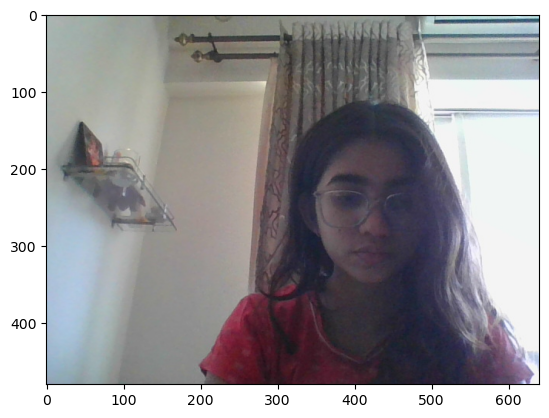

In [5]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [6]:
#3 values for each keypoint*17 keypoints=51 keypoint values, 5 remaining are the bounding box stuff
results['output_0'].numpy()[:, :, :51].reshape((6, 17, 3))

#keypoints are like
#nose
#left eye
#right eye
#and so on..

array([[[5.59739053e-01, 6.60675704e-01, 5.97644925e-01],
        [4.96183783e-01, 7.25762010e-01, 5.40028691e-01],
        [4.95330065e-01, 6.12849951e-01, 5.57422578e-01],
        [5.22948563e-01, 8.05880487e-01, 6.38536632e-01],
        [5.33513248e-01, 5.45257330e-01, 5.03467381e-01],
        [7.98385680e-01, 8.98207784e-01, 4.77235585e-01],
        [7.31530309e-01, 4.28893298e-01, 5.05624890e-01],
        [8.75578701e-01, 9.33590293e-01, 5.03158644e-02],
        [8.60723674e-01, 3.54040802e-01, 1.62067916e-02],
        [8.43353510e-01, 8.16324890e-01, 7.50648230e-02],
        [8.48877966e-01, 4.71687794e-01, 5.44964820e-02],
        [8.79128218e-01, 7.53632307e-01, 7.55624380e-04],
        [8.55115354e-01, 5.13590991e-01, 8.46130642e-05],
        [8.34261298e-01, 7.36525476e-01, 2.30494402e-02],
        [8.03899229e-01, 4.29464638e-01, 2.78807282e-02],
        [3.99998844e-01, 7.27911115e-01, 7.29963474e-04],
        [4.76156324e-01, 5.36499441e-01, 1.07743330e-02]],

       [[3.8

In [22]:
keypoints_with_scores[4]

array([[0.55973905, 0.6606757 , 0.5976449 ],
       [0.49618378, 0.725762  , 0.5400287 ],
       [0.4962736 , 0.6121983 , 0.5526314 ],
       [0.52294856, 0.8058805 , 0.63853663],
       [0.53254414, 0.5687999 , 0.02574999],
       [0.77122706, 0.89020556, 0.3115271 ],
       [0.73733634, 0.5620346 , 0.00612459],
       [0.87932426, 0.95094717, 0.05570257],
       [0.82018924, 0.60627234, 0.03525942],
       [0.7350574 , 0.8048654 , 0.03412053],
       [0.7402147 , 0.673767  , 0.04300398],
       [0.8832565 , 0.83764017, 0.01753315],
       [0.8631891 , 0.688317  , 0.01121934],
       [0.84074265, 0.8391782 , 0.01926156],
       [0.82964486, 0.6802678 , 0.01415442],
       [0.68046576, 0.86684287, 0.00696488],
       [0.6782742 , 0.74412495, 0.00628882]], dtype=float32)

In [17]:
#draw keypoints

def draw_keypoints(frame, keypoints, confidence_threshold):
    y, x, c = frame.shape
    shaped = np.squeeze(np.multiply(keypoints, [y,x,1]))
    
    for kp in shaped:
        ky, kx, kp_conf = kp
        if kp_conf > confidence_threshold:
            cv2.circle(frame, (int(kx), int(ky)), 6, (0,255,0), -1)

In [19]:
#draw connections
def draw_connections(frame, keypoints, edges, confidence_threshold):
    y, x, c = frame.shape
    shaped = np.squeeze(np.multiply(keypoints, [y,x,1]))
    
    for edge, color in edges.items():
        p1, p2 = edge
        y1, x1, c1 = shaped[p1]
        y2, x2, c2 = shaped[p2]
        
        if (c1 > confidence_threshold) & (c2 > confidence_threshold):      
            cv2.line(frame, (int(x1), int(y1)), (int(x2), int(y2)), (0,0,255), 4)

In [23]:
# Function to loop through each person detected and render
def loop_through_people(frame, keypoints_with_scores, edges, confidence_threshold):
    for person in keypoints_with_scores:
        draw_connections(frame, person, edges, confidence_threshold)
        draw_keypoints(frame, person, confidence_threshold)